# Scikit-learn

In [17]:
import numpy as np

In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [30]:
from sklearn.datasets import fetch_california_housing, load_iris, load_boston

In [42]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [55]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [57]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20936ba8>,
      dtype=object)

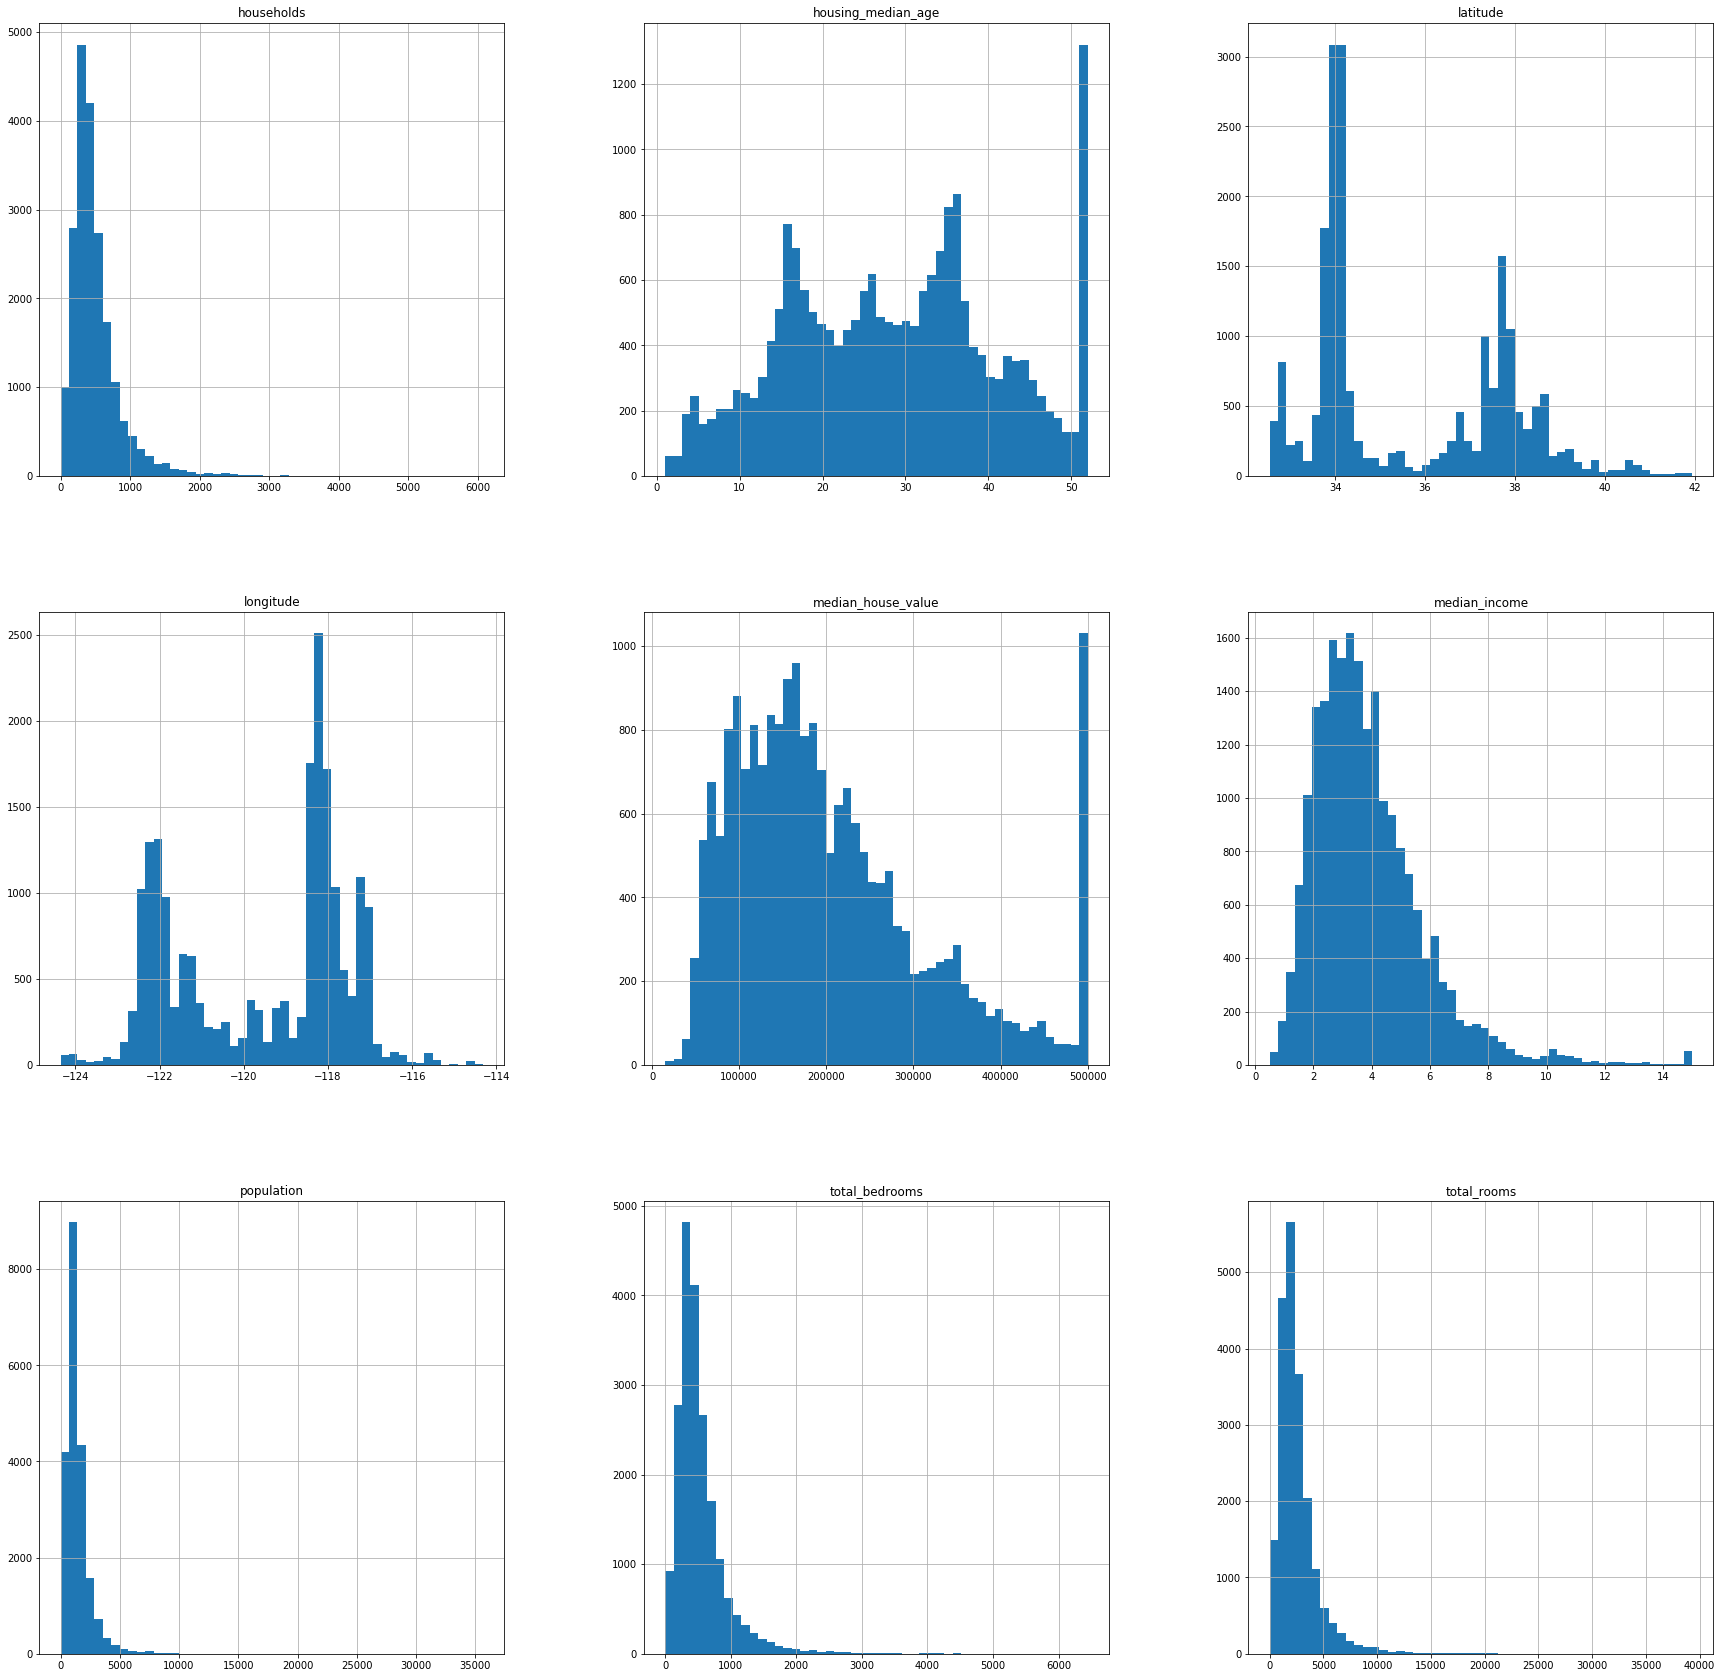

In [60]:
housing.hist(figsize=(30, 30), bins=50)

In [61]:
from sklearn.model_selection import train_test_split

In [65]:
train_set, test_set = train_test_split(housing, test_size=0.2)

In [69]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15898,-122.39,37.72,52.0,135.0,34.0,93.0,26.0,2.1484,181300.0,NEAR BAY
19950,-119.34,36.23,12.0,4965.0,872.0,2191.0,804.0,3.5611,90200.0,INLAND
5434,-118.42,34.01,33.0,2731.0,535.0,1280.0,510.0,4.7083,420100.0,<1H OCEAN
3974,-118.58,34.18,28.0,908.0,142.0,368.0,143.0,5.6159,340500.0,<1H OCEAN
1702,-122.30,37.97,34.0,2854.0,528.0,1211.0,452.0,3.5353,164700.0,NEAR BAY


In [70]:
train_set.size

165120

In [71]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6792,-118.15,34.08,48.0,3697.0,816.0,2446.0,787.0,3.3988,199200.0,<1H OCEAN
9301,-122.56,38.01,21.0,2144.0,400.0,840.0,398.0,4.6000,239500.0,NEAR BAY
18720,-122.37,40.60,7.0,5178.0,1336.0,2557.0,1283.0,2.4079,111400.0,INLAND
10916,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,172500.0,<1H OCEAN
20212,-119.22,34.28,24.0,2212.0,332.0,899.0,331.0,5.5330,299700.0,NEAR OCEAN


In [72]:
test_set.size

41280